#Project 1: Billionaires

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns


In [5]:
import matplotlib.pyplot as plt

In [6]:
import folium 

In [7]:
from folium.plugins import HeatMap

In [8]:
from geopy.geocoders import Nominatim

<font size="5">**Data import form Kaggle**

In [9]:
data = pd.read_csv(r"C:\Users\luisf\Desktop\project1\billionaires-by-country-2024.csv")

In [10]:
data

,population_2024,Population_growthRate,Country_land_area,country,region,unMember,population_density_km,population_densityMi,BillionairesRichestBillionaire2023,BillionairesRichestNetWorth2023,BillionairesPerMillionPeople2023,BillionairesTotalNetWorth2023
0,1441719852,0.00916,3287590.00,India,Asia,True,484.9067,1255.9084,Mukesh Ambani,83.4,0.103,669.2
1,1425178782,-0.00035,9706961.00,China,Asia,True,151.2174,391.6530,Zhong Shanshan,68.0,0.253,1644.7
2,341814420,0.00535,9372610.00,United States,North America,True,37.3673,96.7813,Elon Musk,180.0,1.853,4490.8
3,279798049,0.00816,1904569.00,Indonesia,Asia,True,149.0254,385.9758,Low Tuck Kwong,25.5,0.056,138.4
4,229152217,0.02389,923768.00,Nigeria,Africa,True,251.6027,651.6511,Aliko Dangote,14.2,0.014,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...
73,63788,0.00384,78.00,Guernsey,Europe,False,1012.5079,2622.3956,Stephen Lansdown,2.3,15.834,2.3
74,47847,0.00193,261.00,Saint Kitts and Nevis,North America,True,184.0269,476.6297,Myron Wentz,1.3,37.037,1.3
75,39822,0.00601,160.00,Liechtenstein,Europe,True,248.8875,644.6186,Christoph Zeller,2.3,25.710,2.3
76,36157,-0.00386,2.02,Monaco,Europe,True,18078.5000,46823.3150,Stefano Pessina,8.3,78.740,12.4


In [11]:
data = data.drop('population_densityMi', axis=1)

**Reorder the columns**

In [12]:
original_columns = ['population_2024', 'Population_growthRate', 'Country_land_area', 'country', 'region', 'unMember',
                    'population_density_km', 'BillionairesRichestBillionaire2023',
                    'BillionairesRichestNetWorth2023', 'BillionairesPerMillionPeople2023', 'BillionairesTotalNetWorth2023']

# Better Order
new_column_order = ['country', 'region', 'unMember', 'population_2024', 'Population_growthRate', 'Country_land_area',
                    'population_density_km', 'BillionairesRichestBillionaire2023',
                    'BillionairesRichestNetWorth2023', 'BillionairesPerMillionPeople2023', 'BillionairesTotalNetWorth2023']

# Create a new DataFrame with reordered columns
data_reordered = data[original_columns].copy()  # Make a copy to preserve the original DataFrame
data_reordered = data_reordered[new_column_order]


In [13]:
data_reordered

,country,region,unMember,population_2024,Population_growthRate,Country_land_area,population_density_km,BillionairesRichestBillionaire2023,BillionairesRichestNetWorth2023,BillionairesPerMillionPeople2023,BillionairesTotalNetWorth2023
0,India,Asia,True,1441719852,0.00916,3287590.00,484.9067,Mukesh Ambani,83.4,0.103,669.2
1,China,Asia,True,1425178782,-0.00035,9706961.00,151.2174,Zhong Shanshan,68.0,0.253,1644.7
2,United States,North America,True,341814420,0.00535,9372610.00,37.3673,Elon Musk,180.0,1.853,4490.8
3,Indonesia,Asia,True,279798049,0.00816,1904569.00,149.0254,Low Tuck Kwong,25.5,0.056,138.4
4,Nigeria,Africa,True,229152217,0.02389,923768.00,251.6027,Aliko Dangote,14.2,0.014,28.5
...,...,...,...,...,...,...,...,...,...,...,...
73,Guernsey,Europe,False,63788,0.00384,78.00,1012.5079,Stephen Lansdown,2.3,15.834,2.3
74,Saint Kitts and Nevis,North America,True,47847,0.00193,261.00,184.0269,Myron Wentz,1.3,37.037,1.3
75,Liechtenstein,Europe,True,39822,0.00601,160.00,248.8875,Christoph Zeller,2.3,25.710,2.3
76,Monaco,Europe,True,36157,-0.00386,2.02,18078.5000,Stefano Pessina,8.3,78.740,12.4


In [14]:
data_reordered.isnull().sum()

country                               1
region                                1
unMember                              1
population_2024                       0
Population_growthRate                 0
Country_land_area                     0
population_density_km                 1
BillionairesRichestBillionaire2023    1
BillionairesRichestNetWorth2023       1
BillionairesPerMillionPeople2023      1
BillionairesTotalNetWorth2023         6
dtype: int64

In [15]:
data_reordered[data_reordered.isnull().any(axis=1)]

,country,region,unMember,population_2024,Population_growthRate,Country_land_area,population_density_km,BillionairesRichestBillionaire2023,BillionairesRichestNetWorth2023,BillionairesPerMillionPeople2023,BillionairesTotalNetWorth2023
6,Bangladesh,Asia,True,174701211,0.01010,147570.0,1342.1004,Muhammed Aziz Khan,1.00,1.0,NaN
44,Greece,Europe,True,10302720,-0.00373,131990.0,79.9280,Maria Angelicoussis,0.56,16.6,NaN
62,Panama,North America,True,4527961,0.01340,75417.0,61.0402,Stanley Motta,1.00,1.0,NaN
64,Armenia,Asia,True,2777979,0.00000,29743.0,97.5757,Ruben Vardanyan & family,1.20,1.2,NaN
70,Belize,North America,True,416656,0.01419,22966.0,18.2664,Kenneth Dart,3.90,3.9,NaN
77,NaN,NaN,NaN,TRUE,1472.90000,12198.8,NaN,NaN,NaN,NaN,NaN


**Row 77 deleted due to null values**

In [16]:
data_reordered.drop(77, axis=0, inplace=True)

In [17]:
data_reordered[data_reordered.isnull().any(axis=1)]

,country,region,unMember,population_2024,Population_growthRate,Country_land_area,population_density_km,BillionairesRichestBillionaire2023,BillionairesRichestNetWorth2023,BillionairesPerMillionPeople2023,BillionairesTotalNetWorth2023
6,Bangladesh,Asia,True,174701211,0.01010,147570.0,1342.1004,Muhammed Aziz Khan,1.00,1.0,NaN
44,Greece,Europe,True,10302720,-0.00373,131990.0,79.9280,Maria Angelicoussis,0.56,16.6,NaN
62,Panama,North America,True,4527961,0.01340,75417.0,61.0402,Stanley Motta,1.00,1.0,NaN
64,Armenia,Asia,True,2777979,0.00000,29743.0,97.5757,Ruben Vardanyan & family,1.20,1.2,NaN
70,Belize,North America,True,416656,0.01419,22966.0,18.2664,Kenneth Dart,3.90,3.9,NaN


<font size="5"> How the Billionares are distributed worldwide?

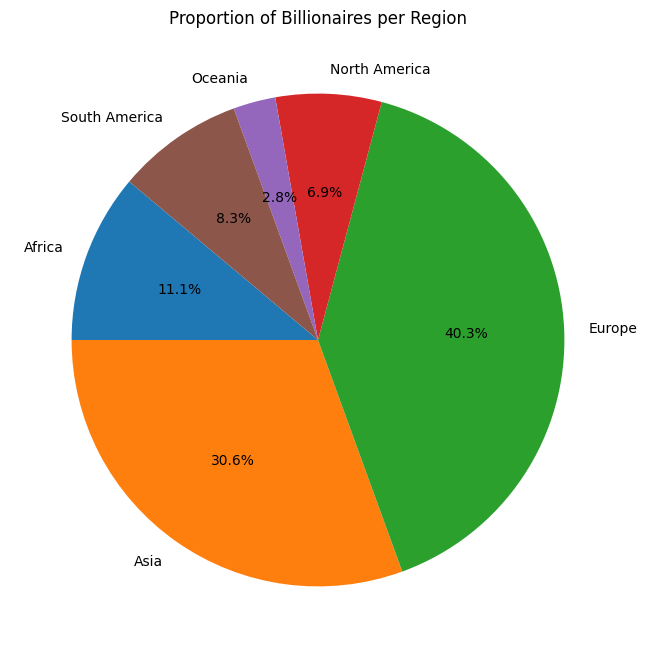

In [18]:
# Replace 'BillionairesTotalNetWorth2023' with the actual column representing billionaires' total net worth
billionaires_by_region = data.groupby('region')['BillionairesTotalNetWorth2023'].count()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(billionaires_by_region, labels=billionaires_by_region.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Billionaires per Region')
plt.show()

In [19]:
data_reordered

,country,region,unMember,population_2024,Population_growthRate,Country_land_area,population_density_km,BillionairesRichestBillionaire2023,BillionairesRichestNetWorth2023,BillionairesPerMillionPeople2023,BillionairesTotalNetWorth2023
0,India,Asia,True,1441719852,0.00916,3287590.00,484.9067,Mukesh Ambani,83.4,0.103,669.2
1,China,Asia,True,1425178782,-0.00035,9706961.00,151.2174,Zhong Shanshan,68.0,0.253,1644.7
2,United States,North America,True,341814420,0.00535,9372610.00,37.3673,Elon Musk,180.0,1.853,4490.8
3,Indonesia,Asia,True,279798049,0.00816,1904569.00,149.0254,Low Tuck Kwong,25.5,0.056,138.4
4,Nigeria,Africa,True,229152217,0.02389,923768.00,251.6027,Aliko Dangote,14.2,0.014,28.5
...,...,...,...,...,...,...,...,...,...,...,...
72,Barbados,North America,True,282309,0.00111,430.00,656.5326,Rihanna,1.4,3.559,1.4
73,Guernsey,Europe,False,63788,0.00384,78.00,1012.5079,Stephen Lansdown,2.3,15.834,2.3
74,Saint Kitts and Nevis,North America,True,47847,0.00193,261.00,184.0269,Myron Wentz,1.3,37.037,1.3
75,Liechtenstein,Europe,True,39822,0.00601,160.00,248.8875,Christoph Zeller,2.3,25.710,2.3


<font size="5"> The top 10 richest billionaires (families and/or person)

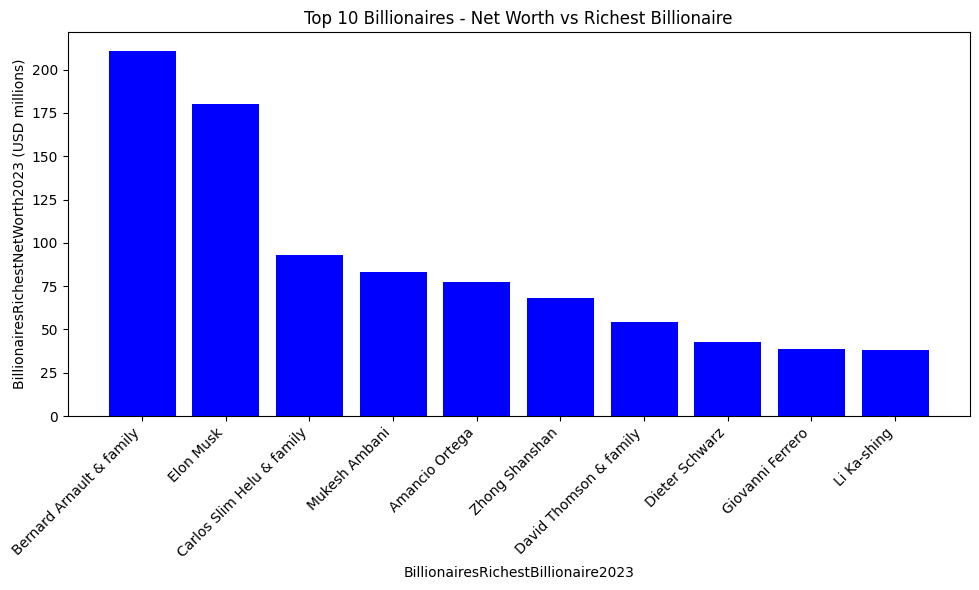

In [22]:
# Replace 'BillionairesRichestBillionaire2023' and 'BillionairesRichestNetWorth2023' with the actual column names

# Sort the DataFrame by 'BillionairesRichestNetWorth2023' in descending order
sorted_data = data.sort_values(by='BillionairesRichestNetWorth2023', ascending=False)

# Select the top 10 values
top_10_data = sorted_data.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_data['BillionairesRichestBillionaire2023'], top_10_data['BillionairesRichestNetWorth2023'], color='blue')
plt.xlabel('BillionairesRichestBillionaire2023')
plt.ylabel('BillionairesRichestNetWorth2023 (USD millions)')
plt.title('Top 10 Billionaires - Net Worth vs Richest Billionaire')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

<font size="5"> Top 10 countries by Billionaires total net worth

C:\Users\luisf\AppData\Local\Temp\ipykernel_16704\1870495124.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='BillionairesTotalNetWorth2023', data=top_10_data, palette='viridis')


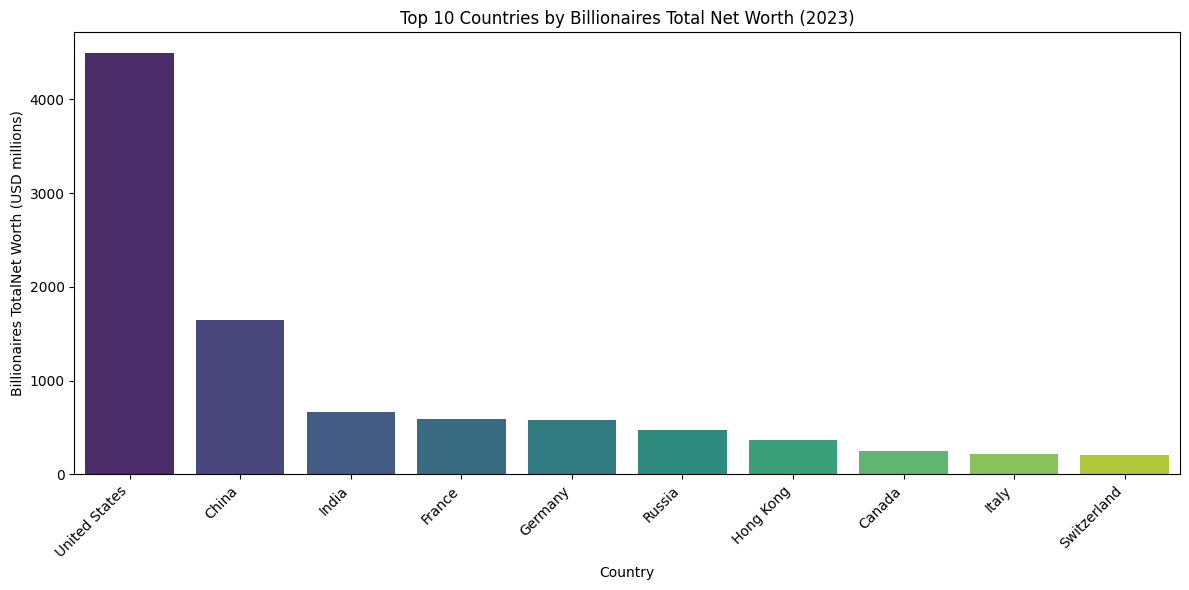

In [23]:
# Replace 'country' and 'BillionairesTotalNetWorth2023' with the actual column names

# Sort the DataFrame by 'BillionairesTotalNetWorth2023' in descending order
sorted_data = data.sort_values(by='BillionairesTotalNetWorth2023', ascending=False)

# Select the top 10 values
top_10_data = sorted_data.head(10)

# Create a bar chart with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='BillionairesTotalNetWorth2023', data=top_10_data, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Billionaires TotalNet Worth (USD millions)')
plt.title('Top 10 Countries by Billionaires Total Net Worth (2023)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

<font size="5"> How Billionaires total net worth is distributed (Other countries group the ones that contributes less than 2% of the net worth)

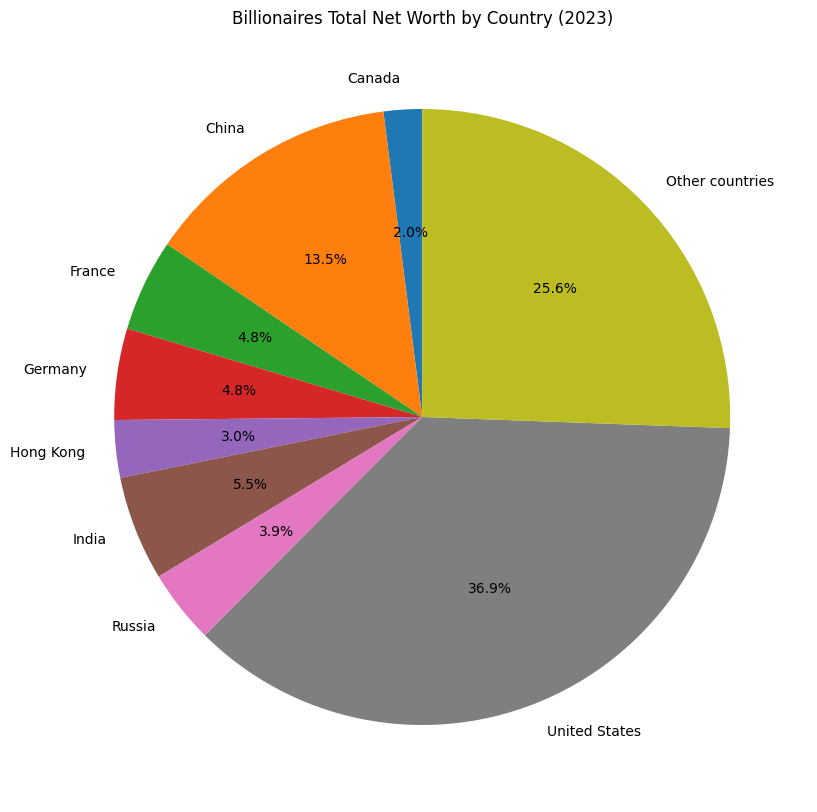

In [36]:
# Group by country and sum the total net worth of billionaires
total_net_worth_by_country = data.groupby('country')['BillionairesTotalNetWorth2023'].sum()

# Filter countries that contribute less than 2%
threshold_percentage = 2
significant_countries = total_net_worth_by_country[total_net_worth_by_country >= (threshold_percentage / 100) * total_net_worth_by_country.sum()]
other_countries_total_net_worth = total_net_worth_by_country[total_net_worth_by_country < (threshold_percentage / 100) * total_net_worth_by_country.sum()].sum()

# Combine significant countries and 'Other countries'
total_net_worth_by_country_combined = pd.concat([significant_countries, pd.Series({'Other countries': other_countries_total_net_worth})])

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(total_net_worth_by_country_combined, labels=total_net_worth_by_country_combined.index, autopct='%1.1f%%', startangle=90)
plt.title('Billionaires Total Net Worth by Country (2023)')
plt.show()

<font size="5"> USA concentrates more than 36% of the billionaire net worth and in second place is China with 13.5%. Any other country with billionaires represent less than 6% of the worldwide net worth.